In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn .preprocessing import StandardScaler, scale 
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
X = df.drop('Type', axis = 1)
y = df['Type']

In [7]:
X_scaled = scale(X)

In [8]:
#Determining the best value for K
kfold = KFold(10)
accuracy = []
k = range(1,41)

for i in k:
    model = KNeighborsClassifier(n_neighbors = i)
    result = cross_val_score(model, X_scaled, y, cv = kfold)
    accuracy.append([np.mean(result), i])
accuracy

[[0.5586580086580086, 1],
 [0.5844155844155845, 2],
 [0.5619047619047619, 3],
 [0.551948051948052, 4],
 [0.5523809523809524, 5],
 [0.4426406926406926, 6],
 [0.4149350649350649, 7],
 [0.4238095238095238, 8],
 [0.4383116883116883, 9],
 [0.4283549783549783, 10],
 [0.41948051948051945, 11],
 [0.42900432900432905, 12],
 [0.41948051948051945, 13],
 [0.42878787878787883, 14],
 [0.40108225108225104, 15],
 [0.3963203463203463, 16],
 [0.38246753246753246, 17],
 [0.3917748917748917, 18],
 [0.38246753246753246, 19],
 [0.3686147186147186, 20],
 [0.3779220779220779, 21],
 [0.3547619047619047, 22],
 [0.35454545454545455, 23],
 [0.35043290043290043, 24],
 [0.3363636363636363, 25],
 [0.34610389610389614, 26],
 [0.3041125541125541, 27],
 [0.32251082251082247, 28],
 [0.3041125541125541, 29],
 [0.2811688311688311, 30],
 [0.2577922077922078, 31],
 [0.2534632034632035, 32],
 [0.2582251082251082, 33],
 [0.2487012987012987, 34],
 [0.2443722943722944, 35],
 [0.22575757575757574, 36],
 [0.23051948051948049, 37]

In [9]:
accuracy_df = pd.DataFrame(accuracy, columns = ['Accuracy', 'K'])
accuracy_df

,Accuracy,K
0,0.558658,1
1,0.584416,2
2,0.561905,3
3,0.551948,4
4,0.552381,5
5,0.442641,6
6,0.414935,7
7,0.423810,8
8,0.438312,9
9,0.428355,10


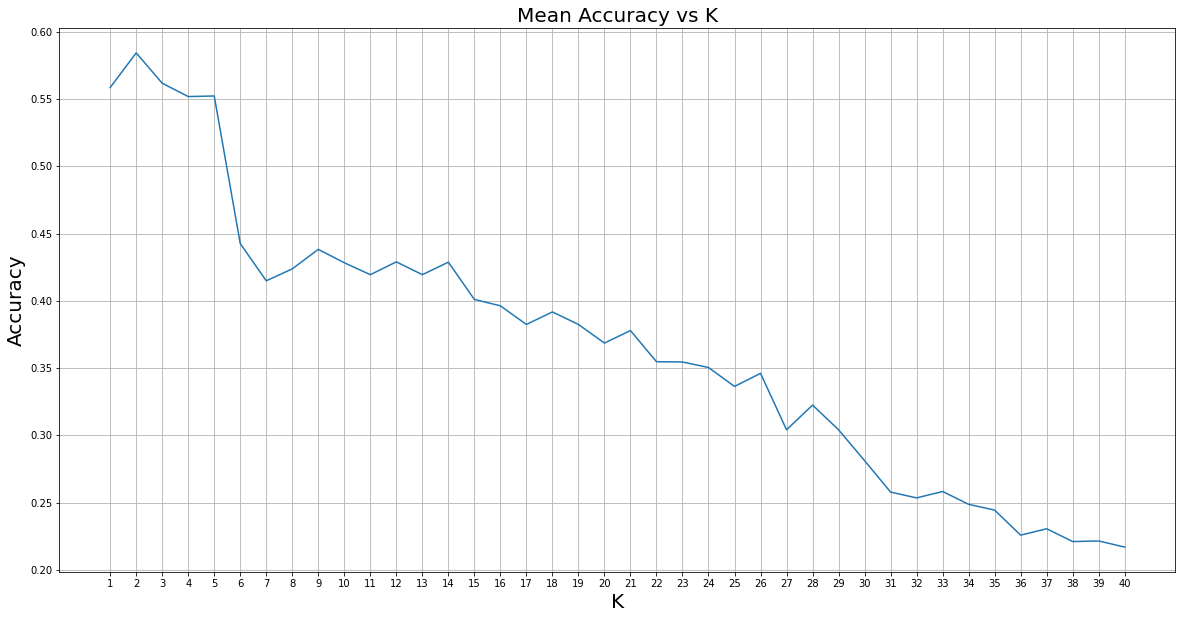

In [10]:
plt.figure(figsize = (20,10))
plt.plot(k, accuracy_df['Accuracy'])
plt.xlabel('K', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(k)
plt.title('Mean Accuracy vs K', fontsize = 20)
plt.grid()

In [11]:
max_accuracy = accuracy_df[accuracy_df['Accuracy'] == accuracy_df['Accuracy'].max()]
K_best = int(max_accuracy['K'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [13]:
model = KNeighborsClassifier(n_neighbors = K_best)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [14]:
predictions = model.predict(X_test)
np.mean(predictions == y_test)

0.6744186046511628

In [15]:
confusion_matrix(y_test, predictions)

array([[9, 2, 0, 0, 0, 0],
       [5, 9, 0, 0, 0, 0],
       [2, 1, 0, 0, 0, 0],
       [0, 2, 0, 2, 0, 0],
       [0, 0, 0, 1, 2, 0],
       [0, 0, 0, 0, 1, 7]])

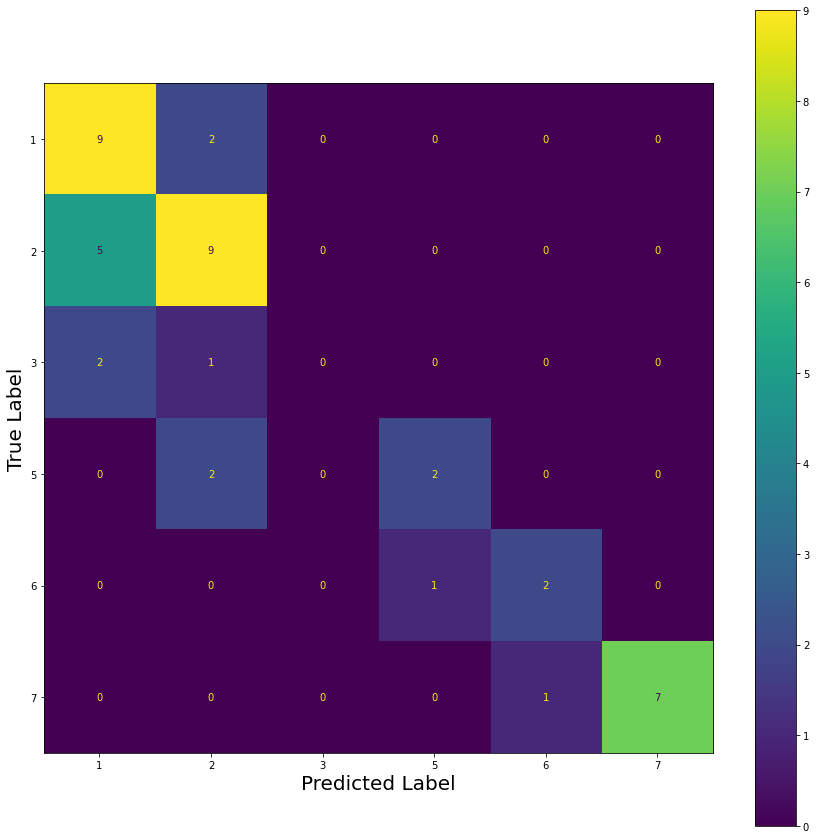

In [16]:
fig, ax = plt.subplots(figsize = (15,15))
plot_confusion_matrix(model, X_test, y_test, ax = ax)
ax.set_xlabel('Predicted Label', fontsize = 20)
ax.set_ylabel('True Label', fontsize = 20)
plt.show()